<a href="https://colab.research.google.com/github/hackdavid/classification_handwritten_code/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


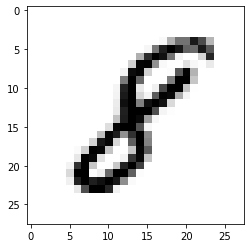

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.2026 - accuracy: 0.9397
Epoch 2/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0810 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0584 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0405 - accuracy: 0.9867
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0350 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0287 - accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0248 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0186 - accuracy: 0.9935
Epoch 10/10
60000/60000 [====================

In [8]:

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 59us/step


[0.06001211615344009, 0.9865999817848206]

In [0]:
model.save_weights('model.h5')

In [15]:
import numpy as np
predictions=model.predict(x_test[:5])
print(np.argmax(predictions,axis=1))
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]
